In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
data=pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.shape

(299, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data[['sex','DEATH_EVENT']].groupby(['sex'],as_index=False).mean().sort_values(by='DEATH_EVENT',ascending=0)


,sex,DEATH_EVENT
0,0,0.323810
1,1,0.319588


In [8]:
data[['anaemia','DEATH_EVENT']].groupby(['anaemia'],as_index=False).mean().sort_values(by='DEATH_EVENT',ascending=0)


,anaemia,DEATH_EVENT
1,1,0.356589
0,0,0.294118


In [9]:
data[['diabetes','DEATH_EVENT']].groupby(['diabetes'],as_index=False).mean().sort_values(by='DEATH_EVENT',ascending=0)


,diabetes,DEATH_EVENT
0,0,0.321839
1,1,0.320000


In [10]:
data[['smoking','DEATH_EVENT']].groupby(['smoking'],as_index=False).mean().sort_values(by='DEATH_EVENT',ascending=0)


,smoking,DEATH_EVENT
0,0,0.325123
1,1,0.312500


In [11]:
data['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
42.000     7
72.000     7
40.000     7
80.000     7
85.000     6
62.000     5
52.000     5
68.000     5
61.000     4
73.000     4
59.000     4
49.000     4
51.000     4
82.000     3
69.000     3
90.000     3
46.000     3
64.000     3
48.000     2
66.000     2
54.000     2
95.000     2
77.000     2
57.000     2
78.000     2
60.667     2
44.000     2
67.000     2
41.000     1
79.000     1
81.000     1
86.000     1
43.000     1
47.000     1
87.000     1
56.000     1
94.000     1
Name: age, dtype: int64

In [12]:
data.loc[data['age']<=30,'age']=0
data.loc[(data['age']>30)&(data['age']<=45),'age']=1
data.loc[(data['age']>45)&(data['age']<=60),'age']=2
data.loc[(data['age']>60)&(data['age']<=75),'age']=3
data.loc[data['age']>75,'age']=4
data['age']=data['age'].astype(int)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,3,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,2,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,3,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
data[['age','DEATH_EVENT']].groupby(['age'],as_index=False).mean().sort_values(by='DEATH_EVENT',ascending=0)


,age,DEATH_EVENT
3,4,0.633333
2,3,0.308411
1,2,0.296000
0,1,0.189189


<Figure size 1440x1080 with 0 Axes>

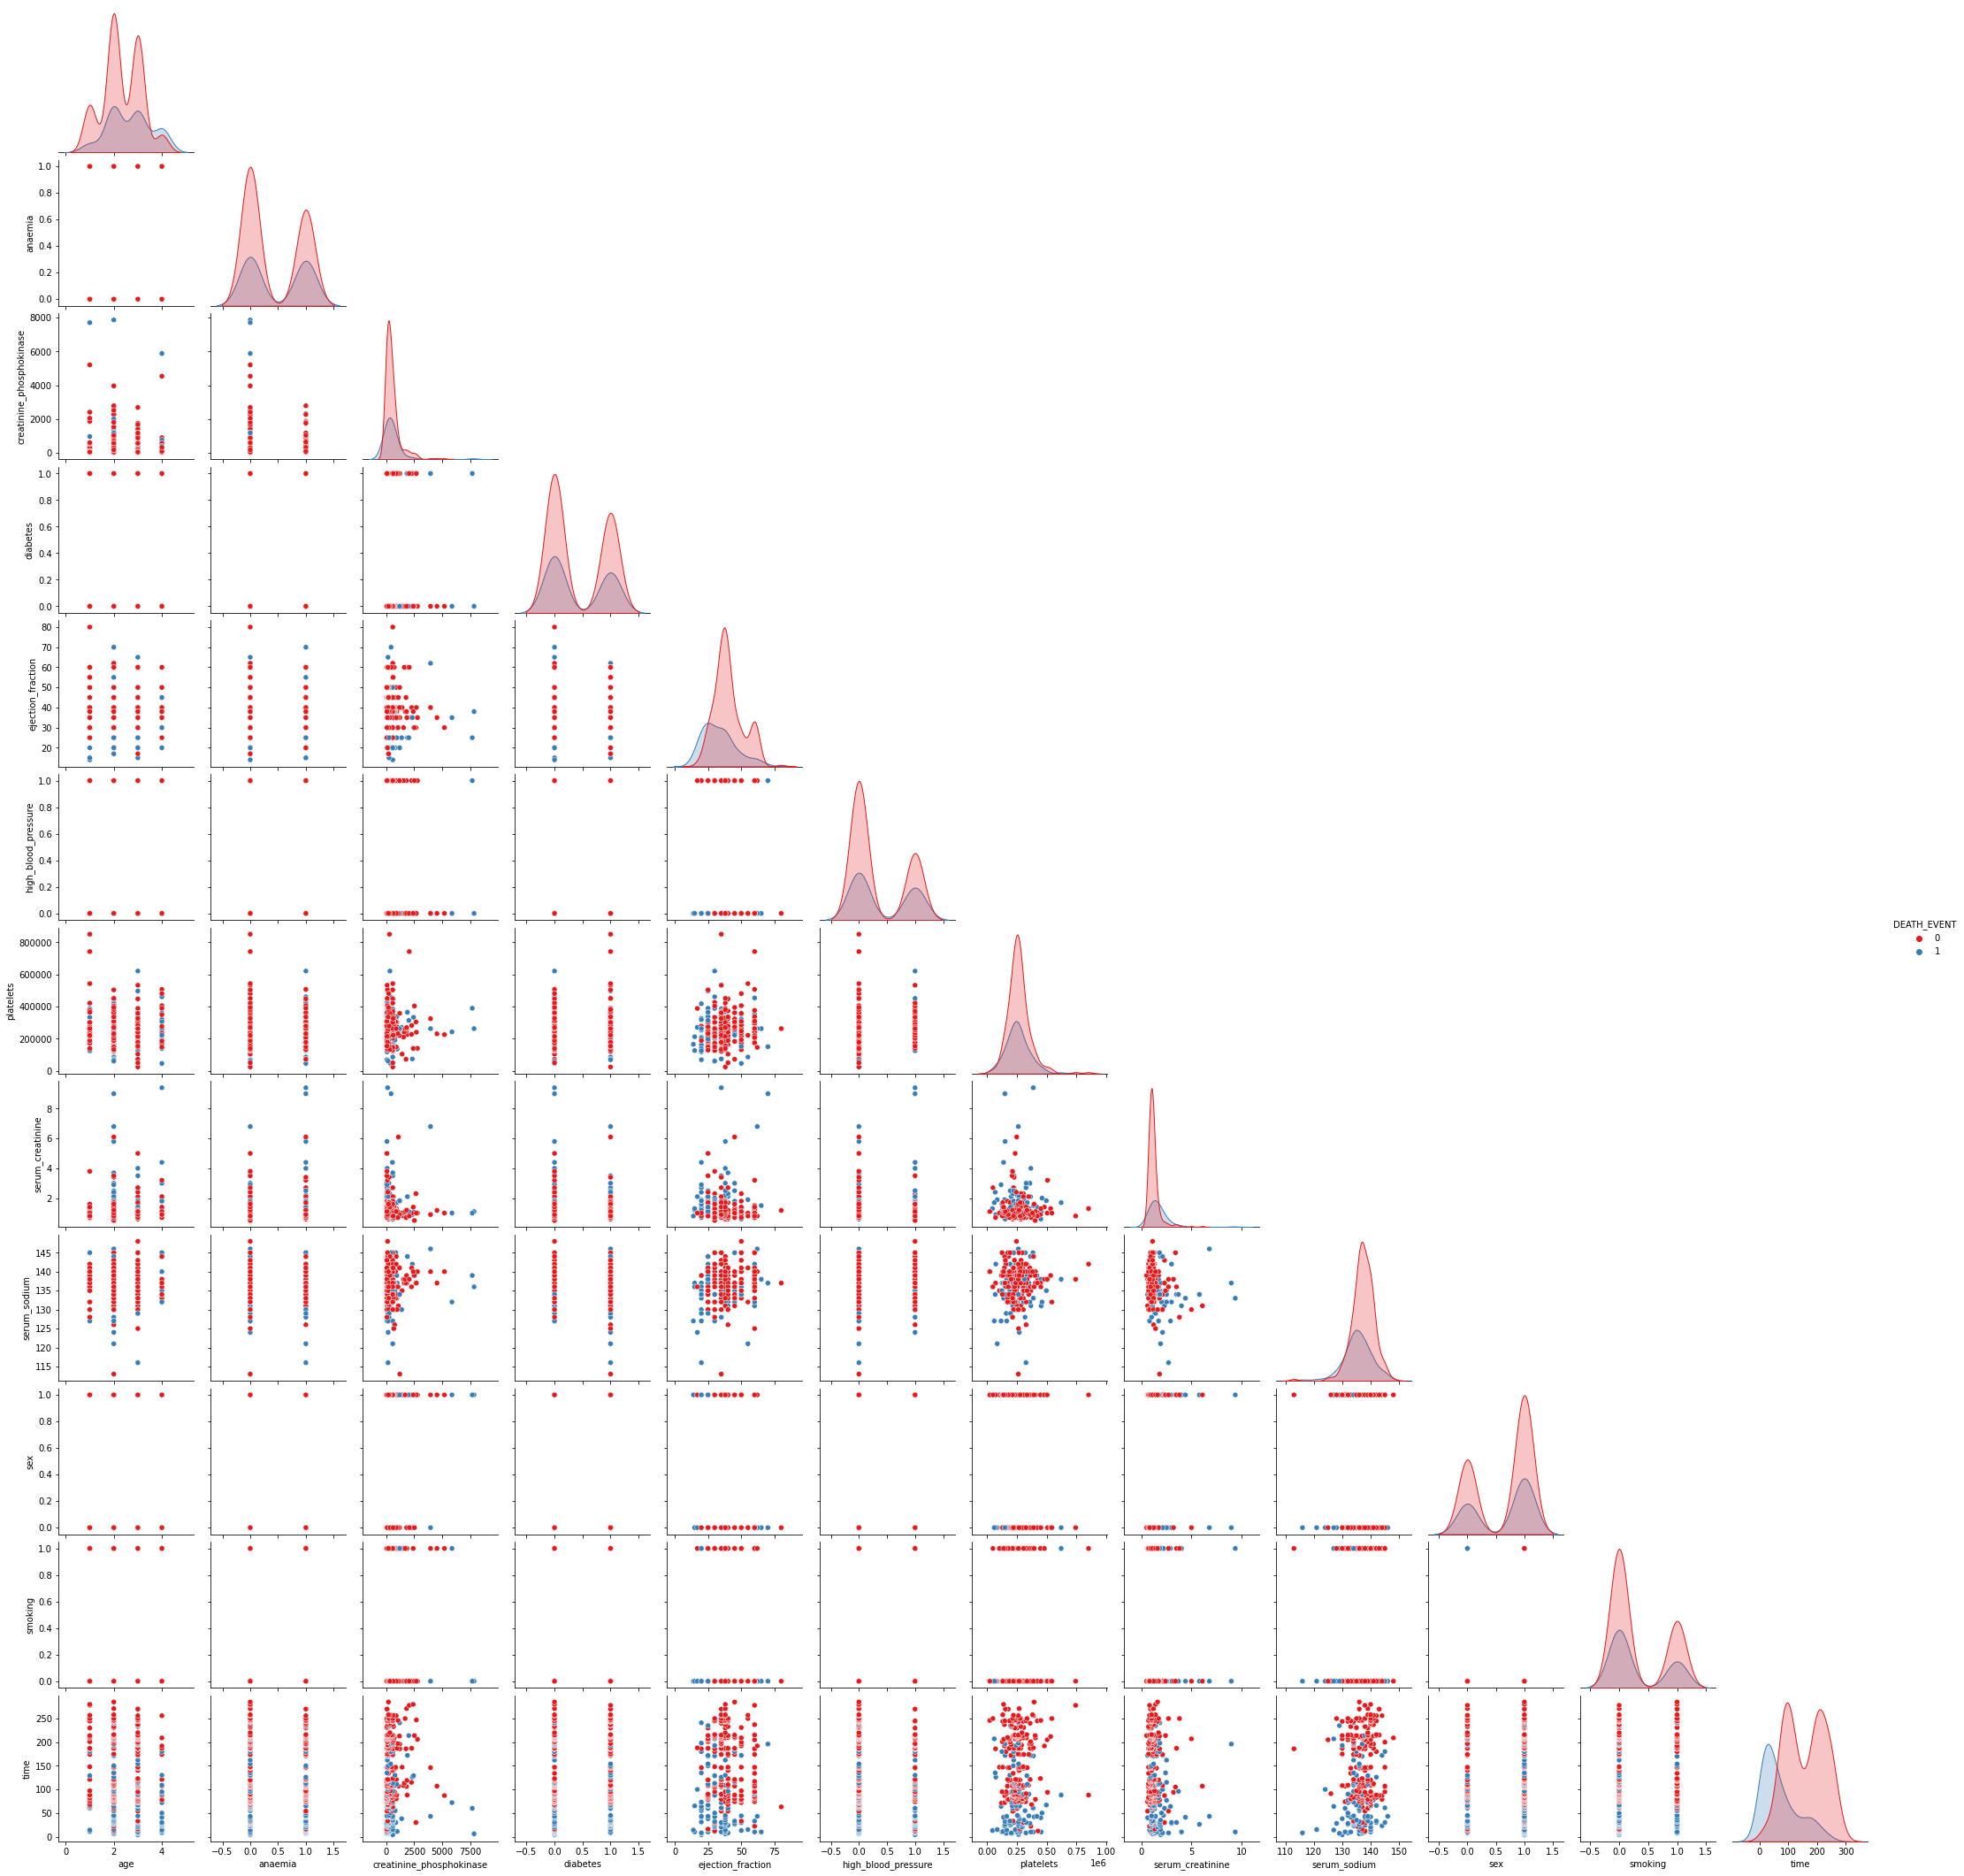

In [14]:
plt.figure(figsize=(20,15))
sns.pairplot(data , hue='DEATH_EVENT' , palette='Set1' , corner = True)


<AxesSubplot:>

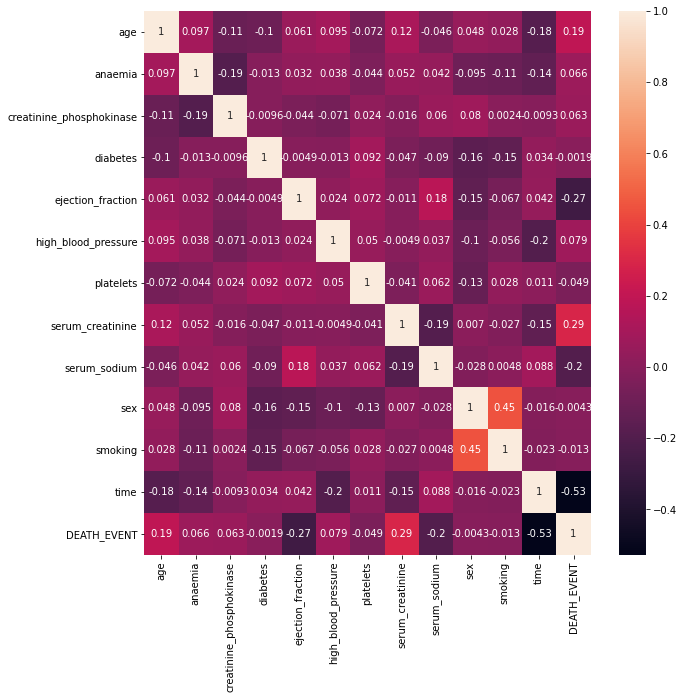

In [15]:
plt.figure(figsize=(10,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

In [16]:
outlier_percentage = {}
for feature in ['creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine','time','serum_sodium']:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'creatinine_phosphokinase': 9.7,
 'ejection_fraction': 0.67,
 'platelets': 7.02,
 'serum_creatinine': 9.7,
 'time': 0.0,
 'serum_sodium': 1.34}

In [17]:
outlier = data[(data[feature]>Lower_range) & (data[feature]<Upper_range)].reset_index(drop=True)


In [18]:
X=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)

ExtraTreesClassifier()

In [20]:
ex.feature_importances_


array([0.06471119, 0.0284234 , 0.07905192, 0.03070768, 0.14242009,
       0.02175565, 0.07474899, 0.13172389, 0.08210952, 0.02657658,
       0.02874269, 0.28902841])

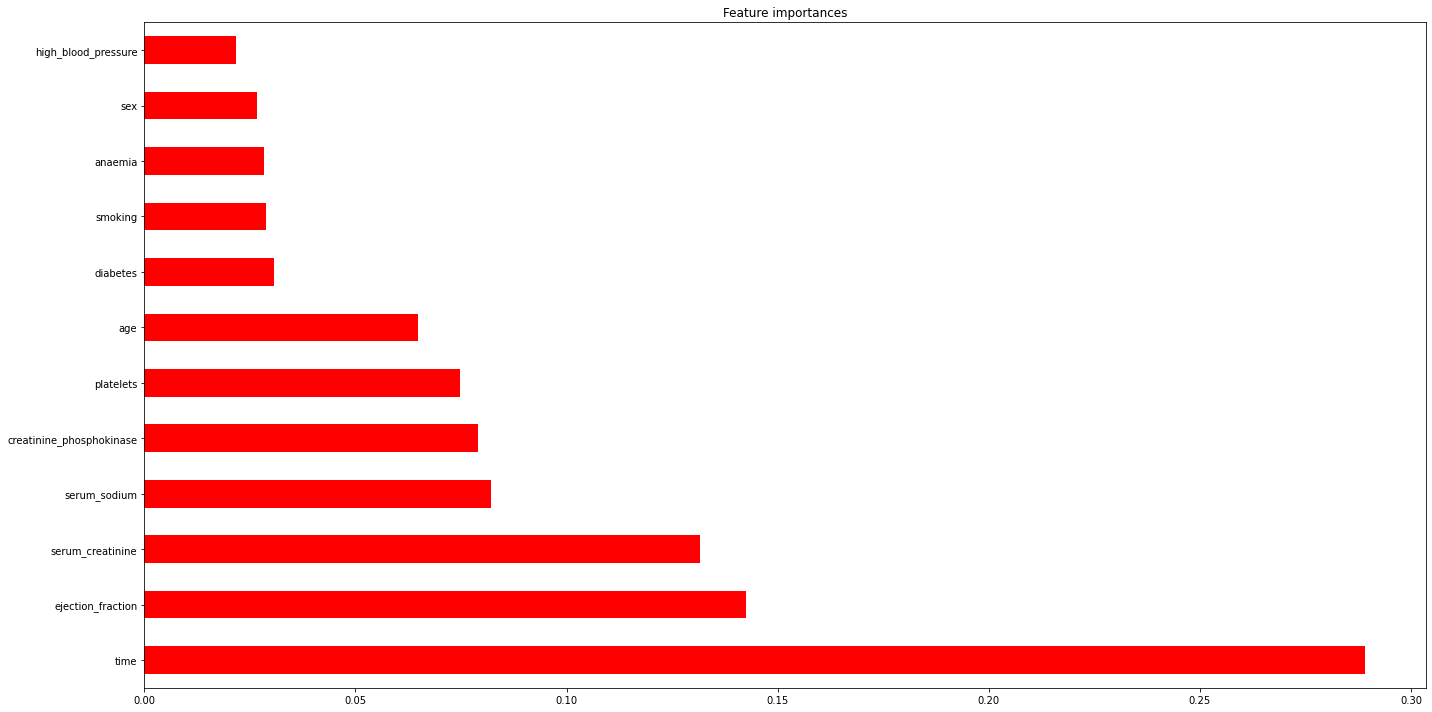

In [21]:
plt.figure(figsize=(20,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X.columns)
feat.nlargest(12).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.show()

In [22]:
data.drop(['sex','high_blood_pressure','anaemia','age','smoking','diabetes','platelets','creatinine_phosphokinase','serum_sodium'],axis=1,inplace=True)


In [23]:
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=18 , stratify=y)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [25]:
from tensorflow import keras

In [26]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [27]:
Model=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                           keras.layers.Dense(1,activation='sigmoid')])

In [28]:
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model.fit(X_train,y_train,epochs=128,batch_size=64,validation_split=0.2,callbacks=[callback],verbose=1)

Epoch 1/128
3/3 [==============================] - 1s 325ms/step - loss: 0.5966 - acc: 0.6717 - val_loss: 0.6364 - val_acc: 0.6458
Epoch 2/128
3/3 [==============================] - 0s 32ms/step - loss: 0.5701 - acc: 0.7050 - val_loss: 0.6166 - val_acc: 0.6667
Epoch 3/128
3/3 [==============================] - 0s 31ms/step - loss: 0.5652 - acc: 0.7004 - val_loss: 0.5977 - val_acc: 0.6667
Epoch 4/128
3/3 [==============================] - 0s 31ms/step - loss: 0.5467 - acc: 0.7011 - val_loss: 0.5802 - val_acc: 0.6875
Epoch 5/128
3/3 [==============================] - 0s 31ms/step - loss: 0.5296 - acc: 0.7356 - val_loss: 0.5641 - val_acc: 0.6875
Epoch 6/128
3/3 [==============================] - 0s 31ms/step - loss: 0.5148 - acc: 0.7304 - val_loss: 0.5488 - val_acc: 0.6875
Epoch 7/128
3/3 [==============================] - 0s 31ms/step - loss: 0.5051 - acc: 0.7481 - val_loss: 0.5347 - val_acc: 0.6875
Epoch 8/128
3/3 [==============================] - 0s 31ms/step - loss: 0.4969 - acc: 0.7

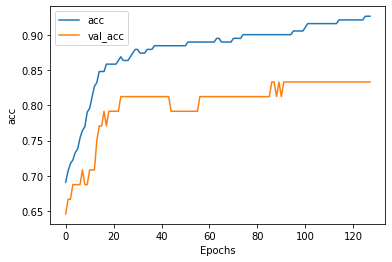

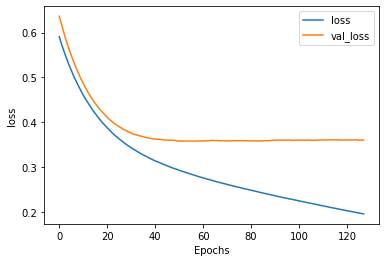

In [29]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [30]:
Model1=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                           keras.layers.Dense(1,activation='sigmoid')])
Model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model1.fit(X_train,y_train,epochs=20,batch_size=10,validation_split=0.2,callbacks=[callback],verbose=1)

Epoch 1/20
20/20 [==============================] - 1s 13ms/step - loss: 0.7133 - acc: 0.5081 - val_loss: 0.5648 - val_acc: 0.7917
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5897 - acc: 0.7351 - val_loss: 0.5039 - val_acc: 0.8542
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5296 - acc: 0.8199 - val_loss: 0.4616 - val_acc: 0.8333
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4964 - acc: 0.7981 - val_loss: 0.4305 - val_acc: 0.8125
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4654 - acc: 0.8217 - val_loss: 0.4040 - val_acc: 0.7917
Epoch 6/20
20/20 [==============================] - 0s 5ms/step - loss: 0.4395 - acc: 0.8357 - val_loss: 0.3873 - val_acc: 0.7708
Epoch 7/20
20/20 [==============================] - 0s 5ms/step - loss: 0.4120 - acc: 0.8677 - val_loss: 0.3761 - val_acc: 0.7708
Epoch 8/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3802 - acc: 0.8

In [31]:
y_pred_deep1=Model1.predict(X_test)


<AxesSubplot:>

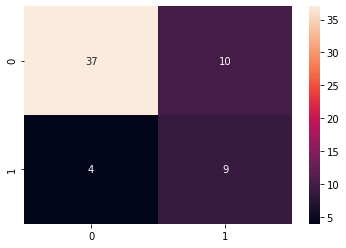

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(pd.DataFrame(confusion_matrix(y_pred_deep1.round(),y_test)) , annot=True)


In [35]:
print(classification_report(y_test, y_pred_deep1.round()))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84        41
           1       0.69      0.47      0.56        19

    accuracy                           0.77        60
   macro avg       0.74      0.69      0.70        60
weighted avg       0.76      0.77      0.75        60



In [36]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [37]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

In [38]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=3
                                            ).mean()

    return model_scores

In [39]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

[01:04:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:04:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:04:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:04:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'Logistic Regression': 0.65,
 'KNN': 0.65,
 'Decision Tree': 0.75,
 'Random Forest': 0.8666666666666666,
 'Gradient Boosting Classifier': 0.7000000000000001,
 'Support Vector Machine': 0.7166666666666667,
 'Stochastic Gradien Descent': 0.6166666666666667,
 'Naive Bayes': 0.6666666666666666,
 'xgb Classifier': 0.7833333333333333}

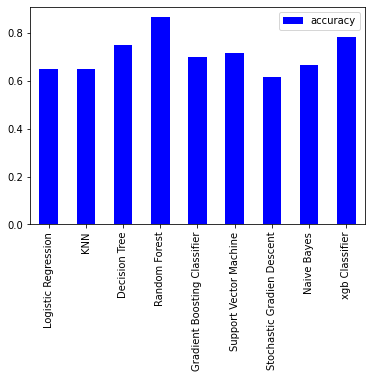

In [40]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="blue");

In [41]:
np.random.seed(18)
params = {"n_estimators": [50,100,200, 300,400 ] ,
 "max_depth": [ 3,5,7,9,10],
 "max_features" : [ 'auto', 'sqrt', 'log2']}


rs = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                verbose=0,
                              refit=True,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5}

In [42]:
rs.best_estimator_


RandomForestClassifier(max_depth=5, max_features='log2')

In [43]:
rs.best_score_

0.8661919831223628

In [44]:
rs.score(X_test, y_test)


0.85

In [48]:
model = RandomForestClassifier(n_estimators= 100, max_features= 'log2', max_depth= 5)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

<AxesSubplot:>

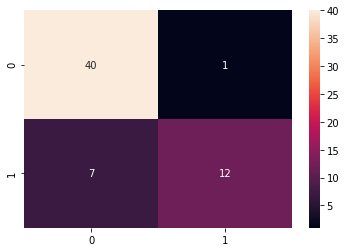

In [49]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1)) , annot=True)


In [50]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60

